In [0]:
import numpy as np
import pandas as pd 

In [0]:
from matplotlib import pyplot as plt

In [0]:
df=pd.read_csv("/content/dataset_merged.csv")

In [0]:
df.shape

(3314, 28)

In [0]:
df.columns

Index(['Unnamed: 0', 'Price Hub', 'Trade Date', 'Delivery Start Date',
       'Delivery End Date', 'High Price $/MWh', 'Low Price $/MWh',
       'Wtd Avg Price $/MWh', 'Change', 'Daily Volume MWh', 'Number of Trades',
       'Number of Companies', 'date_x', 'DNI', 'Temperature', 'DHI',
       'Pressure', 'Relative Humidity', 'Wind Speed', 'date_y', 'Date_x',
       'Date_y', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [0]:
df.dtypes

Unnamed: 0               int64
Price Hub               object
Trade Date              object
Delivery Start Date     object
Delivery End Date       object
High Price $/MWh       float64
Low Price $/MWh        float64
Wtd Avg Price $/MWh    float64
Change                 float64
Daily Volume MWh         int64
Number of Trades         int64
Number of Companies      int64
date_x                  object
DNI                    float64
Temperature            float64
DHI                    float64
Pressure               float64
Relative Humidity      float64
Wind Speed             float64
date_y                  object
Date_x                  object
Date_y                  object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
dtype: object

In [0]:
df.head()

,Unnamed: 0,Price Hub,Trade Date,Delivery Start Date,Delivery End Date,High Price $/MWh,Low Price $/MWh,Wtd Avg Price $/MWh,Change,Daily Volume MWh,Number of Trades,Number of Companies,DNI,Temperature,DHI,Pressure,Relative Humidity,Wind Speed,Open,High,Low,Close,Adj Close,Volume
0,0,PJM West,2001-01-02,2001-01-03,2001-01-03,65.5,64.5,65.00,NaN,1600,2,2,68797.394129,-2032.755534,10899.537536,333825.486044,24807.885149,908.896006,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1.129400e+09
1,1,PJM West,2001-01-03,2001-01-04,2001-01-04,63.0,59.5,61.25,-3.75,3200,4,2,68287.310395,-1686.358518,9436.261309,331530.197305,25660.590828,911.679211,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1.880700e+09
2,2,PJM West,2001-01-04,2001-01-05,2001-01-05,60.0,58.5,59.12,-2.13,4800,6,4,42744.555823,-1077.961501,12108.243022,329297.608277,26548.007320,839.573580,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2.131000e+09
3,3,PJM West,2001-01-08,2001-01-09,2001-01-09,59.5,59.5,59.50,0.38,800,1,2,23221.851299,-683.114533,13144.172281,327948.291627,30604.138980,537.587199,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1.115500e+09
4,4,PJM West,2001-01-09,2001-01-10,2001-01-10,58.0,55.5,56.61,-2.89,5600,7,6,74552.056304,-1418.512031,10884.741097,329242.584216,24703.976372,1128.615640,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1.191300e+09


In [0]:
df.dtypes

Unnamed: 0               int64
Price Hub               object
Trade Date              object
Delivery Start Date     object
Delivery End Date       object
High Price $/MWh       float64
Low Price $/MWh        float64
Wtd Avg Price $/MWh    float64
Change                 float64
Daily Volume MWh         int64
Number of Trades         int64
Number of Companies      int64
DNI                    float64
Temperature            float64
DHI                    float64
Pressure               float64
Relative Humidity      float64
Wind Speed             float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
dtype: object

In [0]:
df=df.drop(['date_y','Date_x','Date_y','date_x'],axis=1)

In [0]:
df_lstm=df.drop(['Price Hub','Delivery Start Date','Delivery End Date'],axis=1)

In [0]:
df_lstm.head()

,Unnamed: 0,Trade Date,High Price $/MWh,Low Price $/MWh,Wtd Avg Price $/MWh,Change,Daily Volume MWh,Number of Trades,Number of Companies,DNI,Temperature,DHI,Pressure,Relative Humidity,Wind Speed,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-02,65.5000,64.5000,65.0000,nan,1600,2,2,68797.3941,-2032.7555,10899.5375,333825.4860,24807.8851,908.8960,1320.2800,1320.2800,1276.0500,1283.2700,1283.2700,1129400000.0000
1,1,2001-01-03,63.0000,59.5000,61.2500,-3.7500,3200,4,2,68287.3104,-1686.3585,9436.2613,331530.1973,25660.5908,911.6792,1283.2700,1347.7600,1274.6200,1347.5601,1347.5601,1880700000.0000
2,2,2001-01-04,60.0000,58.5000,59.1200,-2.1300,4800,6,4,42744.5558,-1077.9615,12108.2430,329297.6083,26548.0073,839.5736,1347.5601,1350.2400,1329.1400,1333.3400,1333.3400,2131000000.0000
3,3,2001-01-08,59.5000,59.5000,59.5000,0.3800,800,1,2,23221.8513,-683.1145,13144.1723,327948.2916,30604.1390,537.5872,1298.3500,1298.3500,1276.2900,1295.8600,1295.8600,1115500000.0000
4,4,2001-01-09,58.0000,55.5000,56.6100,-2.8900,5600,7,6,74552.0563,-1418.5120,10884.7411,329242.5842,24703.9764,1128.6156,1295.8600,1311.7200,1295.1400,1300.8000,1300.8000,1191300000.0000


In [0]:
df_lstm.dtypes

Unnamed: 0               int64
Trade Date              object
High Price $/MWh       float64
Low Price $/MWh        float64
Wtd Avg Price $/MWh    float64
Change                 float64
Daily Volume MWh         int64
Number of Trades         int64
Number of Companies      int64
DNI                    float64
Temperature            float64
DHI                    float64
Pressure               float64
Relative Humidity      float64
Wind Speed             float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
dtype: object

In [0]:
X=df.values

In [0]:
X.shape

(3314, 24)

In [0]:
Dates=X[:,2]

In [0]:
Dates.shape

(3314,)

In [0]:
Dates

array(['2001-01-02', '2001-01-03', '2001-01-04', ..., '2013-12-27',
       '2013-12-30', '2013-12-31'], dtype=object)

In [0]:
Price=X[:,7]

In [0]:
Price.shape

(3314,)

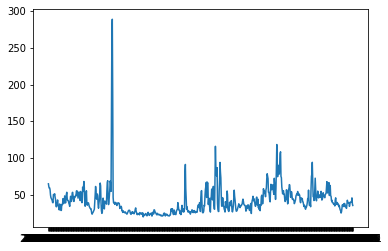

In [0]:
plt.plot(Dates[:730],Price[:730])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
X=df_lstm.values

In [0]:
df_lstm.dtypes

Trade Date             datetime64[ns]
High Price $/MWh              float64
Low Price $/MWh               float64
Wtd Avg Price $/MWh           float64
Change                        float64
Daily Volume MWh                int64
Number of Trades                int64
Number of Companies             int64
DNI                           float64
Temperature                   float64
DHI                           float64
Pressure                      float64
Relative Humidity             float64
Wind Speed                    float64
Open                          float64
High                          float64
Low                           float64
Close                         float64
Adj Close                     float64
Volume                        float64
dtype: object

In [0]:
df_lstm=df_lstm.drop(['Unnamed: 0'],axis=1)

In [0]:
df_lstm2.head()

,Trade Date,High Price $/MWh,Low Price $/MWh,Wtd Avg Price $/MWh,Change,Daily Volume MWh,Number of Trades,Number of Companies,DNI,Temperature,DHI,Pressure,Relative Humidity,Wind Speed,Open,High,Low,Close,Adj Close,Volume
1,2001-01-03,63.0000,59.5000,61.2500,-3.7500,3200,4,2,68287.3104,-1686.3585,9436.2613,331530.1973,25660.5908,911.6792,1283.2700,1347.7600,1274.6200,1347.5601,1347.5601,1880700000.0000
2,2001-01-04,60.0000,58.5000,59.1200,-2.1300,4800,6,4,42744.5558,-1077.9615,12108.2430,329297.6083,26548.0073,839.5736,1347.5601,1350.2400,1329.1400,1333.3400,1333.3400,2131000000.0000
3,2001-01-08,59.5000,59.5000,59.5000,0.3800,800,1,2,23221.8513,-683.1145,13144.1723,327948.2916,30604.1390,537.5872,1298.3500,1298.3500,1276.2900,1295.8600,1295.8600,1115500000.0000
4,2001-01-09,58.0000,55.5000,56.6100,-2.8900,5600,7,6,74552.0563,-1418.5120,10884.7411,329242.5842,24703.9764,1128.6156,1295.8600,1311.7200,1295.1400,1300.8000,1300.8000,1191300000.0000
5,2001-01-10,50.5000,49.0000,49.7500,-6.8600,3200,4,4,70923.0602,-480.1973,10787.1266,330427.8200,25660.6642,1122.0489,1300.8000,1313.7600,1287.2800,1313.2700,1313.2700,1296500000.0000


In [0]:
df_lstm['Trade Date']=pd.to_datetime(df_lstm['Trade Date'], format="%Y-%m-%d")

In [0]:
df_lstm2.shape

(3258, 20)

In [0]:
df_lstm2=df_lstm.dropna(subset=[i for i in df_lstm.columns])

In [0]:
X=df_lstm2.values

In [302]:
X.shape

(3258, 20)

In [303]:
X.dtype

dtype('O')

In [304]:
type(X[0,0])

pandas._libs.tslibs.timestamps.Timestamp

In [306]:
X[0,:]

array([Timestamp('2001-01-03 00:00:00'), 63.0, 59.5, 61.25, -3.75, 3200,
       4, 2, 68287.31039461019, -1686.3585178055826, 9436.261308950912,
       331530.19730510114, 25660.59082771896, 911.6792107795959,
       1283.27002, 1347.76001, 1274.619995, 1347.560059, 1347.560059,
       1880700000.0], dtype=object)

In [0]:
Y=np.zeros((3258,1))

In [0]:
Y[:,0]=X[:,3]

In [309]:
Y.shape

(3258, 1)

In [0]:
features=X[:,[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

In [321]:
X.shape

(3258, 20)

In [311]:
features.shape

(3258, 18)

In [314]:
features[0,:]

array([ 6.3000000e+01,  5.9500000e+01, -3.7500000e+00,  3.2000000e+03,
        4.0000000e+00,  2.0000000e+00,  6.8287312e+04, -1.6863585e+03,
        9.4362617e+03,  3.3153019e+05,  2.5660592e+04,  9.1167920e+02,
        1.2832700e+03,  1.3477600e+03,  1.2746200e+03,  1.3475601e+03,
        1.3475601e+03,  1.8807000e+09], dtype=float32)

In [0]:
features=features.astype('float32')

In [0]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [0]:
features = scaler_x.fit_transform(features)

In [317]:
features[0,:]

array([0.14070188, 0.1609102 , 0.52142996, 0.0078125 , 0.00867052,
       0.        , 0.46481225, 0.15755825, 0.11635678, 0.5776367 ,
       0.5126916 , 0.28145093, 0.51903   , 0.5653327 , 0.5170292 ,
       0.57263434, 0.57263434, 0.13735208], dtype=float32)

In [0]:
Y=scaler_y.fit_transform(Y)

In [319]:
Y[:,0]

array([0.15347419, 0.14555126, 0.14696474, ..., 0.09846005, 0.09600506,
       0.1072757 ])

In [326]:
Y.shape

(3258, 1)

In [0]:
train_size = int(len(features) * 0.90)
test_size = len(features) - train_size

In [0]:
dataset=np.empty((X.shape[0],19))

In [0]:
dataset[:,18]=Y[:,0]

In [325]:
dataset.shape

(3258, 19)

In [0]:
dataset[:,0:18]=features

In [0]:
df=pd.DataFrame(dataset)

In [0]:
df.to_csv("/content/sample_data/dataset.csv")

In [0]:
df.columns[1]

1

In [0]:
df2=df.dropna(subset=[i for i in range(19)])

In [0]:
df2.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [0]:
dataset=df2.values

In [329]:
dataset[0,:]

array([0.14070188, 0.1609102 , 0.52142996, 0.0078125 , 0.00867052,
       0.        , 0.46481225, 0.15755825, 0.11635678, 0.57763672,
       0.51269162, 0.28145093, 0.51902997, 0.56533271, 0.51702923,
       0.57263434, 0.57263434, 0.13735208, 0.15347419])

In [0]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [331]:
train.shape

(2932, 19)

In [332]:
test.shape

(326, 19)

In [0]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0:18]
        X.append(a)
        Y.append(dataset[i + look_back, 18])
    return np.array(X), np.array(Y)
    
look_back = 10
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [334]:
X_train.shape

(2921, 10, 18)

In [335]:
Y_train=np.array([Y_train]).T;Y_train.shape

(2921, 1)

In [336]:
Y_train.shape

(2921, 1)

In [337]:
Y_test=np.array([Y_test]).T;Y_test.shape

(315, 1)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], 10, 18))
X_test = np.reshape(X_test, (X_test.shape[0], 10, 18))

In [339]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
# model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 2921 samples, validate on 315 samples
Epoch 1/100
2921/2921 [==============================] - 3s 1ms/step - loss: 0.0164 - val_loss: 0.0079
Epoch 2/100
2921/2921 [==============================] - 1s 200us/step - loss: 0.0089 - val_loss: 0.0031
Epoch 3/100
2921/2921 [==============================] - 1s 200us/step - loss: 0.0065 - val_loss: 0.0028
Epoch 4/100
2921/2921 [==============================] - 1s 208us/step - loss: 0.0055 - val_loss: 0.0026
Epoch 5/100
2921/2921 [==============================] - 1s 204us/step - loss: 0.0046 - val_loss: 0.0025
Epoch 6/100
2921/2921 [==============================] - 1s 208us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 7/100
2921/2921 [==============================] - 1s 210us/step - loss: 0.0039 - val_loss: 0.0024
Epoch 8/100
2921/2921 [==============================] - 1s 211us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 9/100
2921/2921 [==============================] - 1s 205us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 10/1

In [340]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
print(X_train.shape,train_predict.shape)
print(Y_train.shape)
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform(Y_train)
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform(Y_test)
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[:,0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[:,0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[:,0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[:,0], test_predict[:,0])))

(2921, 10, 18) (2921, 1)
(2921, 1)
Train Mean Absolute Error: 14.856572382843424
Train Root Mean Squared Error: 17.7803403435254
Test Mean Absolute Error: 19.991219755142453
Test Root Mean Squared Error: 21.424927750859027


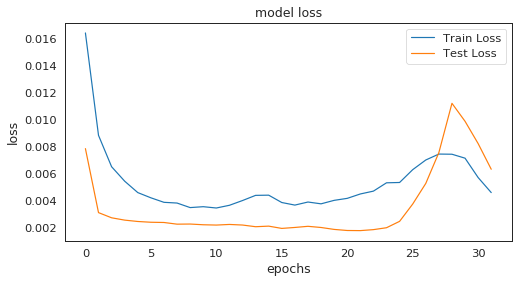

In [341]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [0]:
train_predict.shape

(2921, 1)

In [0]:
train_predict[:,0]

array([14421.404, 14421.402, 14421.402, ..., 14421.439, 14421.439,
       14421.442], dtype=float32)

In [0]:
Y_train.shape

(2921, 1)

In [0]:
Y_train[:,0]

array([13577.5912, 13596.41  , 13483.4972, ..., 14919.1028, 16790.2292,
       13892.134 ])

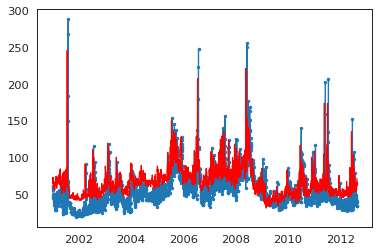

In [343]:
plt.plot(X[:2921,0],X[:2921,3],marker='.',label='actual')
plt.plot(X[:2921,0],train_predict[:,0],'r',label='prediction')
plt.show()

In [0]:
scaler_temp=MinMaxScaler()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
sca2=MinMaxScaler()
data2=[[1,2,3,4]]
data=[[-1,2],[-0.5,6],[0,10],[1,18]]
# print(sca.fit(data))
data=sca.fit_transform(data)

In [0]:
sca.inverse_transform(data)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

AttributeError: ignored